## Prueba #0502 (Solución)

### "Reconocimiento de actividad humana" 

#### Responda las siguientes preguntas proporcionando código Python:
#### Objetivos:
- Realizar la EDA.
- Realizar el preprocesamiento de los datos.
- Optimice y pruebe un modelo predictivo de su elección.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn import metrics, preprocessing
warnings.filterwarnings(action='ignore')                  # Desactivar las advertencias.
%matplotlib inline

#### Leer los datos:
La explicación sobre el conjunto de datos se puede encontrar [aquí](https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones).

In [2]:
# Ir al directorio dónde se ecuentra el fichero 
# os.chdir(r'~~')                # Reemplazar por la ruta adecuada

In [3]:
df = pd.read_csv('data_human activity recognition.csv', header='infer')

In [4]:
df.shape

(19622, 160)

In [5]:
df.columns

Index(['Unnamed: 0', 'user_name', 'raw_timestamp_part_1',
       'raw_timestamp_part_2', 'cvtd_timestamp', 'new_window', 'num_window',
       'roll_belt', 'pitch_belt', 'yaw_belt',
       ...
       'gyros_forearm_x', 'gyros_forearm_y', 'gyros_forearm_z',
       'accel_forearm_x', 'accel_forearm_y', 'accel_forearm_z',
       'magnet_forearm_x', 'magnet_forearm_y', 'magnet_forearm_z', 'classe'],
      dtype='object', length=160)

1). Realice la EDA. Compruebe los valores faltantes. SUGERENCIA: La variable de respuesta es 'clase'.

In [6]:
# Estadística descriptiva de las variables numéricas.
df.describe()

,Unnamed: 0,raw_timestamp_part_1,raw_timestamp_part_2,num_window,roll_belt,pitch_belt,yaw_belt,total_accel_belt,max_roll_belt,max_picth_belt,...,var_yaw_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z
count,19622.000000,1.962200e+04,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,406.000000,406.000000,...,406.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000
mean,9811.500000,1.322827e+09,500656.144277,430.640047,64.407197,0.305283,-11.205061,11.312608,-6.667241,12.923645,...,4639.849068,0.157951,0.075175,0.151245,-61.651819,163.655896,-55.291917,-312.575884,380.116445,393.613745
std,5664.527827,2.049277e+05,288222.879958,247.909554,62.750255,22.351242,95.193926,7.742309,94.594252,8.005960,...,7284.972361,0.648618,3.100725,1.754483,180.593687,200.130082,138.396947,346.958482,509.373742,369.268747
min,1.000000,1.322490e+09,294.000000,1.000000,-28.900000,-55.800000,-180.000000,0.000000,-94.300000,3.000000,...,0.000000,-22.000000,-7.020000,-8.090000,-498.000000,-632.000000,-446.000000,-1280.000000,-896.000000,-973.000000
25%,4906.250000,1.322673e+09,252912.250000,222.000000,1.100000,1.760000,-88.300000,3.000000,-88.000000,5.000000,...,0.274550,-0.220000,-1.460000,-0.180000,-178.000000,57.000000,-182.000000,-616.000000,2.000000,191.000000
50%,9811.500000,1.322833e+09,496380.000000,424.000000,113.000000,5.280000,-13.000000,17.000000,-5.100000,18.000000,...,612.214225,0.050000,0.030000,0.080000,-57.000000,201.000000,-39.000000,-378.000000,591.000000,511.000000
75%,14716.750000,1.323084e+09,751890.750000,644.000000,123.000000,14.900000,12.900000,18.000000,18.500000,19.000000,...,7368.414252,0.560000,1.620000,0.490000,76.000000,312.000000,26.000000,-73.000000,737.000000,653.000000
max,19622.000000,1.323095e+09,998801.000000,864.000000,162.000000,60.300000,179.000000,29.000000,180.000000,30.000000,...,39009.333330,3.970000,311.000000,231.000000,477.000000,923.000000,291.000000,672.000000,1480.000000,1090.000000


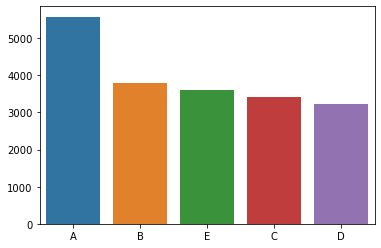

In [7]:
# Tabla de frecuencia de la variable respuesta.
freqs = df.classe.value_counts()
sns.barplot(freqs.index, freqs.values,ci=None)
plt.show()

In [8]:
# PProporción de los valores perdidos por columna.
pd.isnull(df).mean(axis=0)

Unnamed: 0              0.0
user_name               0.0
raw_timestamp_part_1    0.0
raw_timestamp_part_2    0.0
cvtd_timestamp          0.0
                       ... 
accel_forearm_z         0.0
magnet_forearm_x        0.0
magnet_forearm_y        0.0
magnet_forearm_z        0.0
classe                  0.0
Length: 160, dtype: float64

2). Elimine las columnas que tengan más del 97% de valores perdidos.

In [9]:
# Conserve solo aquellas columnas con menos del 97% de valor perdido.
isnotZero = np.array(pd.isnull(df).mean(axis=0) < 0.97)
df = df.loc[:, isnotZero]

In [10]:
# Ahora verifique el resultado. ¡No más valores perdidos!
pd.isnull(df).mean(axis=0)

Unnamed: 0              0.0
user_name               0.0
raw_timestamp_part_1    0.0
raw_timestamp_part_2    0.0
cvtd_timestamp          0.0
new_window              0.0
num_window              0.0
roll_belt               0.0
pitch_belt              0.0
yaw_belt                0.0
total_accel_belt        0.0
gyros_belt_x            0.0
gyros_belt_y            0.0
gyros_belt_z            0.0
accel_belt_x            0.0
accel_belt_y            0.0
accel_belt_z            0.0
magnet_belt_x           0.0
magnet_belt_y           0.0
magnet_belt_z           0.0
roll_arm                0.0
pitch_arm               0.0
yaw_arm                 0.0
total_accel_arm         0.0
gyros_arm_x             0.0
gyros_arm_y             0.0
gyros_arm_z             0.0
accel_arm_x             0.0
accel_arm_y             0.0
accel_arm_z             0.0
magnet_arm_x            0.0
magnet_arm_y            0.0
magnet_arm_z            0.0
roll_dumbbell           0.0
pitch_dumbbell          0.0
yaw_dumbbell        

In [11]:
# Comprueba el tamaño.
df.shape

(19622, 60)

3). Elimine de las columnas innecesarias. SUGERENCIA: Aquellas columnas con "time" en el nombre y aquellas que obviamente son innecesarias.

In [12]:
# Elimine de las columnas con "tiempo" en el nombre.
header =df.columns
isnotTime = []
for col in header:
    if "time" in col:
        isnotTime.append(False)
    else:
        isnotTime.append(True)
df = df.loc[:, isnotTime]

# Elimine las columnas innecesarias
df = df.drop(columns = ['Unnamed: 0','user_name','new_window'])
print(df.shape)
df.head(5)

(19622, 54)


,num_window,roll_belt,pitch_belt,yaw_belt,total_accel_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,accel_belt_y,...,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,classe
0,11,1.41,8.07,-94.4,3,0.00,0.00,-0.02,-21,4,...,0.03,0.00,-0.02,192,203,-215,-17,654.0,476.0,A
1,11,1.41,8.07,-94.4,3,0.02,0.00,-0.02,-22,4,...,0.02,0.00,-0.02,192,203,-216,-18,661.0,473.0,A
2,11,1.42,8.07,-94.4,3,0.00,0.00,-0.02,-20,5,...,0.03,-0.02,0.00,196,204,-213,-18,658.0,469.0,A
3,12,1.48,8.05,-94.4,3,0.02,0.00,-0.03,-22,3,...,0.02,-0.02,0.00,189,206,-214,-16,658.0,469.0,A
4,12,1.48,8.07,-94.4,3,0.02,0.02,-0.02,-21,2,...,0.02,0.00,-0.02,189,206,-214,-17,655.0,473.0,A


4). Codifique la etiqueta de la variable de respuesta. SUGERENCIA: use preprocessing.LabelEncoder ().

In [13]:
LE = preprocessing.LabelEncoder()
X = np.array(df.drop(columns='classe'))
Y = np.array(df.loc[:,'classe'])
Y = LE.fit_transform(Y)

5). Realizar escalado min-max de las variables exploratorias. SUGERENCIA: utilice preprocesamiento.MinMaxScaler ().

In [14]:
scaler = preprocessing.MinMaxScaler()
X = scaler.fit_transform(X)

6). Elija un algoritmo y realice el análisis predictivo.
- Optimizar el (los) hiperparámetro (s)
- Calcule la precisión.
- Consiga una precisión superior al 90%.

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=123)

In [16]:
# Aquí, aplicaremos el KNN.
# Cuadrícula de parámetros.
k_grid = np.arange(1,11,1)
parameters = {'n_neighbors':k_grid}

In [17]:
# Optimizar la k.
gridCV = GridSearchCV(KNeighborsClassifier(), parameters, cv=10, n_jobs = -1)       # "n_jobs = -1" significa "usar todos los núcleos de la CPU".
gridCV.fit(X_train, Y_train)
best_k = gridCV.best_params_['n_neighbors']
print("Best k : " + str(best_k))

Best k : 1


In [18]:
# Testar con la mejor k.
KNN_best = KNeighborsClassifier(n_neighbors=best_k)
KNN_best.fit(X_train, Y_train)
Y_pred = KNN_best.predict(X_test)
print( "Best KNN accuracy : " + str(np.round(metrics.accuracy_score(Y_test,Y_pred),3)))

Best KNN accuracy : 0.986
